<a href="https://colab.research.google.com/github/NSR9/EVA8/blob/main/Session-4/S4_step_3_adding_fancy_stuff_lessthan_8k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Target: 
1. To acheive the accuracy of 99.4% with less than 8000 parameters.

## Changes Made:
1. Reduced the Dropout value to 0.03 from 0.05.
2. Reduced the size of the network to 7,760 parameters.

## What to expect:
1. Training is made slightly easier comapred to previous step but still could observe same trends of training as previous step.
2. Probable good test accuracy not more than 99.4% but aroud 99.35%


## Results:
1. Best Training Accuracy : 98.86% at 15th Epoch
2. Best Test Accuracy : 99.42% at 8th Epoch
3. Params: 7,760

## Analysis:
1. The target is acheived in 15 epochs with less than 8000 network parameters.
2. The accuracy of 99.35% maintained for the last 5 epochs.
3. Acheived test accuracy of 99.42% in 8th epoch but couldnot sustain around it for long, the accuracies were very close to 99.40%.  
3. Model is underfitting with low train accuracy and high test accuracy.
4. The difference between train and test accuracies is less. 

## CALLING THE GODS!

In [26]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

## Model Definition

In [44]:
from torch.nn.modules.conv import Conv2d
from torch.nn.modules.activation import ReLU
d = 0.03
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # Input Block 
        self.inputblock = nn.Sequential(
            # Convlayer 1
            nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, padding=1),     # 28x28 >> 28x28 Rf = 3
            nn.ReLU(),
            nn.BatchNorm2d(8),
            nn.Dropout(d)
        )

        # CONV BLOCK 1 
        self.convblock1 = nn.Sequential(
            # Convlayer 2
            nn.Conv2d(8, 12, 3, padding=1),                                          # 28x28 >> 28x28 Rf = 5
            nn.ReLU(),
            nn.BatchNorm2d(12),
            nn.Dropout(d)  
        )

        # Transition Block 1
        self.transitionblock1 = nn.Sequential(
            # Maxpooling layer 1
            nn.MaxPool2d(2,2),                                                       # 28x28 >> 14x14 Rf = 6
            # 1x1 Convlayer 1
            nn.Conv2d(12, 8, 1, padding=0),                                          # 14x14 >> 14x14 Rf = 6
            nn.ReLU()                                           
        )

        # CONV BLOCK 2
        self.convblock2 = nn.Sequential(        
            # Convlayer 3
            nn.Conv2d(8, 10, 3, padding=1),                                          # 14x14 >> 14x14 Rf = 10
            nn.ReLU(), 
            nn.BatchNorm2d(10),   
            nn.Dropout(d),  
            # Convlayer 4
            nn.Conv2d(10, 16, 3, padding=1),                                         # 14x14 >> 14x14 Rf = 14
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(d)

        )

        # Transition Block 2
        self.transitionblock2 = nn.Sequential(
            # Maxpoolinglayer 2
            nn.MaxPool2d(2,2),                                                       # 14x14 >> 7x7 Rf = 16
            # 1x1 ConvLayer 2
            nn.Conv2d(16, 8, 1, padding=0),                                          # 7x7 >> 7x7. Rf = 16
            nn.ReLU()

        )

        # CONV BLOCK 3
        self.convblock3 = nn.Sequential(
            # Convlayer 5
            nn.Conv2d(8, 10, 3, padding=0),                                          # 7x7 >> 5x5 Rf = 24
            nn.ReLU(),
            nn.BatchNorm2d(10),
            nn.Dropout(d),  
            # Convlayer 6                   
            nn.Conv2d(10, 14, 3, padding=1),                                         # 5x5 >> 5x5 Rf = 32
            nn.ReLU(),
            nn.BatchNorm2d(14),
            nn.Dropout(d), 
            # Convlayer 7
            nn.Conv2d(14, 16, 3, padding=0),                                         # 5x5 >> 3x3 Rf = 40
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(d), 
            # GAP Layer                                          
            nn.AvgPool2d(3),     
            # Output layer                                                           # 3x3 >> 1x1 Rf = 48
            nn.Conv2d(16, 10, 1, padding=0)                                          # 1x1 >> 1x1 Rf = 48
            
        )
        


        

    def forward(self, x):
        x = self.inputblock(x)
        x = self.convblock1(x)
        x = self.transitionblock1(x)
        x = self.convblock2(x)
        x = self.transitionblock2(x)
        x = self.convblock3(x)
        x = x.view(-1, 10)
        return F.log_softmax(x)

## Model Summary 

In [45]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              80
              ReLU-2            [-1, 8, 28, 28]               0
       BatchNorm2d-3            [-1, 8, 28, 28]              16
           Dropout-4            [-1, 8, 28, 28]               0
            Conv2d-5           [-1, 12, 28, 28]             876
              ReLU-6           [-1, 12, 28, 28]               0
       BatchNorm2d-7           [-1, 12, 28, 28]              24
           Dropout-8           [-1, 12, 28, 28]               0
         MaxPool2d-9           [-1, 12, 14, 14]               0
           Conv2d-10            [-1, 8, 14, 14]             104
             ReLU-11            [-1, 8, 14, 14]               0
           Conv2d-12           [-1, 10, 14, 14]             730
    

<ipython-input-44-960def53352f>:79: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


## Initializing Data Transformation objects for Train and Test data

In [46]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.RandomRotation((-10.0, 10.0), fill=(1,)),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

In [48]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

## Initializing Train and Test dataloders for MNIST Dataset

In [49]:

SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


## Inspecting the Train data

torch.Size([128, 1, 28, 28])
torch.Size([128])


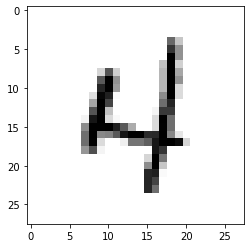

In [50]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

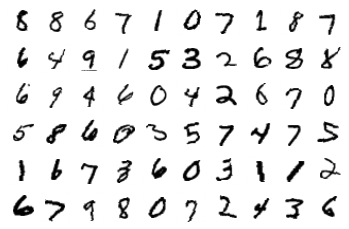

In [51]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

## Train and Test Definitions

In [52]:
from tqdm import tqdm

train_losses = []
train_accs = []
test_losses = []
test_accs= []

def train(model, device, train_loader, optimizer, epoch):
    correct_preds = 0
    processed = 0
    model.train()
    pbar = tqdm(train_loader)
    for batch_idx, (data, target) in enumerate(pbar):
        # Porting the data and targets in to the GPU
        data, target = data.to(device), target.to(device)

        # setting all the gradients to zero
        optimizer.zero_grad()

        # Predict
        output = model(data)

        # Loss calculation 
        loss = F.nll_loss(output, target)
        train_losses.append(loss)

        # Back propogation
        loss.backward()

        # Updating the weights with calculated gradients
        optimizer.step()

        # Calculating the correct number of predictions
        preds = output.argmax(dim=1, keepdim=True)
        correct_preds += preds.eq(target.view_as(preds)).sum().item()
        processed += len(data)
        
        # Logging the results using Pbar
        pbar.set_description(desc= f'Epoch={epoch} Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct_preds/processed:0.2f}')

        # Appending the training accuracies to the train_accs[]
        train_accs.append(100*correct_preds/processed)
        


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            # Porting the data and targets in to the GPU
            data, target = data.to(device), target.to(device)

            # Predict 
            output = model(data)

            # Test loss calculation
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    test_accs.append(100. * correct / len(test_loader.dataset))

## Training and Test loops

In [53]:
from torch.optim.lr_scheduler import StepLR

model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)
num_epochs = 15
for epoch in range(0, num_epochs):
    train(model, device, train_loader, optimizer, epoch)
    scheduler.step()
    test(model, device, test_loader)

  0%|          | 0/469 [00:00<?, ?it/s]<ipython-input-44-960def53352f>:79: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
Epoch=0 Loss=0.10496430844068527 Batch_id=468 Accuracy=87.57: 100%|██████████| 469/469 [00:06<00:00, 71.38it/s]



Test set: Average loss: 0.0743, Accuracy: 9793/10000 (97.93%)



Epoch=1 Loss=0.05292993783950806 Batch_id=468 Accuracy=97.24: 100%|██████████| 469/469 [00:06<00:00, 75.21it/s]



Test set: Average loss: 0.0480, Accuracy: 9854/10000 (98.54%)



Epoch=2 Loss=0.01899578981101513 Batch_id=468 Accuracy=97.82: 100%|██████████| 469/469 [00:06<00:00, 74.45it/s]



Test set: Average loss: 0.0421, Accuracy: 9864/10000 (98.64%)



Epoch=3 Loss=0.11797485500574112 Batch_id=468 Accuracy=98.11: 100%|██████████| 469/469 [00:06<00:00, 76.26it/s]



Test set: Average loss: 0.0371, Accuracy: 9880/10000 (98.80%)



Epoch=4 Loss=0.02002876065671444 Batch_id=468 Accuracy=98.25: 100%|██████████| 469/469 [00:06<00:00, 76.00it/s]



Test set: Average loss: 0.0296, Accuracy: 9907/10000 (99.07%)



Epoch=5 Loss=0.049595773220062256 Batch_id=468 Accuracy=98.59: 100%|██████████| 469/469 [00:06<00:00, 74.64it/s]



Test set: Average loss: 0.0229, Accuracy: 9935/10000 (99.35%)



Epoch=6 Loss=0.08297168463468552 Batch_id=468 Accuracy=98.68: 100%|██████████| 469/469 [00:06<00:00, 74.21it/s]



Test set: Average loss: 0.0219, Accuracy: 9938/10000 (99.38%)



Epoch=7 Loss=0.06245630979537964 Batch_id=468 Accuracy=98.75: 100%|██████████| 469/469 [00:06<00:00, 74.64it/s]



Test set: Average loss: 0.0215, Accuracy: 9942/10000 (99.42%)



Epoch=8 Loss=0.016733292490243912 Batch_id=468 Accuracy=98.78: 100%|██████████| 469/469 [00:06<00:00, 74.80it/s]



Test set: Average loss: 0.0220, Accuracy: 9938/10000 (99.38%)



Epoch=9 Loss=0.04134121909737587 Batch_id=468 Accuracy=98.79: 100%|██████████| 469/469 [00:06<00:00, 74.71it/s]



Test set: Average loss: 0.0214, Accuracy: 9934/10000 (99.34%)



Epoch=10 Loss=0.09046515077352524 Batch_id=468 Accuracy=98.89: 100%|██████████| 469/469 [00:06<00:00, 71.87it/s]



Test set: Average loss: 0.0215, Accuracy: 9932/10000 (99.32%)



Epoch=11 Loss=0.010343118570744991 Batch_id=468 Accuracy=98.85: 100%|██████████| 469/469 [00:06<00:00, 75.21it/s]



Test set: Average loss: 0.0210, Accuracy: 9938/10000 (99.38%)



Epoch=12 Loss=0.16206704080104828 Batch_id=468 Accuracy=98.84: 100%|██████████| 469/469 [00:06<00:00, 73.26it/s]



Test set: Average loss: 0.0211, Accuracy: 9937/10000 (99.37%)



Epoch=13 Loss=0.009042645804584026 Batch_id=468 Accuracy=98.83: 100%|██████████| 469/469 [00:06<00:00, 74.41it/s]



Test set: Average loss: 0.0206, Accuracy: 9938/10000 (99.38%)



Epoch=14 Loss=0.026366332545876503 Batch_id=468 Accuracy=98.86: 100%|██████████| 469/469 [00:06<00:00, 75.64it/s]



Test set: Average loss: 0.0207, Accuracy: 9937/10000 (99.37%)



In [54]:
import numpy 
train_losses = [i.cpu().detach().numpy() for i in train_losses]

In [55]:

test_losses = [i for i in test_losses]
train_accs = [i for i in train_accs]
test_accs = [i for i in test_accs]


## Training and testing Curves

Text(0.5, 1.0, 'Test Accuracy')

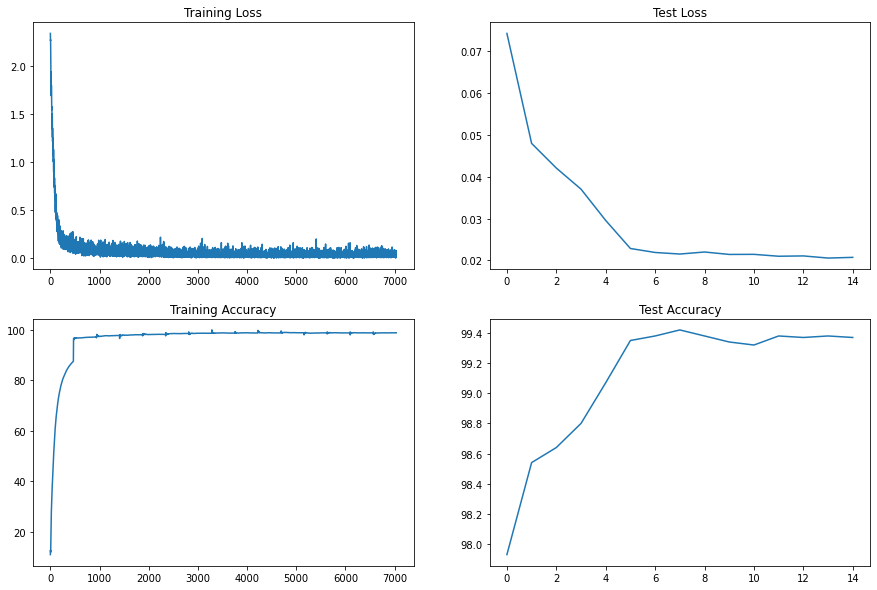

In [56]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_accs)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_accs)
axs[1, 1].set_title("Test Accuracy")